a benchmark test in my laptop

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              4
On-line CPU(s) list: 0-3
Thread(s) per core:  2
Core(s) per socket:  2
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               142
Model name:          Intel(R) Core(TM) i5-7200U CPU @ 2.50GHz


In [1]:
import numpy as np
import time

In [2]:
import matplotlib.pyplot as plt
from stemsegmentation import segmentationSTEM

In [3]:
image = np.load('FeNb_phase_boundary.npy')

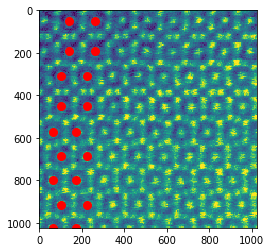

In [48]:
plt.imshow(image[:,:])
plt.plot([140],[48],'ro',markersize=8)
plt.plot([260],[48],'ro',markersize=8)
plt.plot([140],[190],'ro',markersize=8)
plt.plot([260],[190],'ro',markersize=8)
plt.plot([102],[310],'ro',markersize=8)
plt.plot([222],[310],'ro',markersize=8)
plt.plot([102],[450],'ro',markersize=8)
plt.plot([222],[450],'ro',markersize=8)
plt.plot([62],[570],'ro',markersize=8)
plt.plot([172],[570],'ro',markersize=8)
plt.plot([102],[685],'ro',markersize=8)
plt.plot([222],[685],'ro',markersize=8)
plt.plot([62],[800],'ro',markersize=8)
plt.plot([172],[800],'ro',markersize=8)
plt.plot([102],[915],'ro',markersize=8)
plt.plot([222],[915],'ro',markersize=8)
plt.plot([62],[1023],'ro',markersize=8)
plt.plot([172],[1023],'ro',markersize=8)

In [74]:
step = 40

In [75]:
descriptor_name = 'local_correlation_map'
seg = segmentationSTEM( n_patterns=2,
                       window_x=150,window_y=150,
                       patch_x=150,patch_y=150,
                       step=step,
                       descriptor_name=descriptor_name,
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

time_cost:   1.26[s]


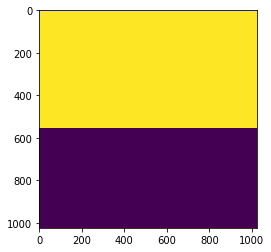

In [76]:
plt.imshow(labels)

In [77]:
descriptor_name = 'power_spectrum'
seg = segmentationSTEM( n_patterns=2,
                       window_x=150,window_y=150,
                       step=step,
                       descriptor_name=descriptor_name,
                       power_spectrum_logarithm=False,
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

time_cost:   2.41[s]


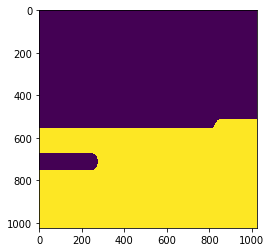

In [78]:
plt.imshow(labels)

In [79]:
descriptor_name = 'reflection_symmetry_maximums'
seg = segmentationSTEM(n_patterns=2,
                       window_x=150,window_y=150,
                       radius=150,
                       step=step,
                       descriptor_name=descriptor_name,
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

time_cost:   4.31[s]


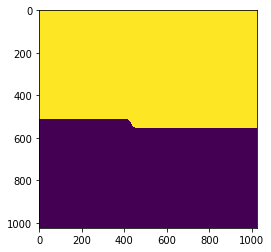

In [80]:
plt.imshow(labels)

In [81]:
descriptor_name = 'rotational_symmetry_maximums'
seg = segmentationSTEM( n_patterns=2,   #       rotational symmetry can only differentiate the grain boundary and the matrix
                       window_x=150,window_y=150,
                       radius=150,
                       step=step,
                       descriptor_name=descriptor_name,
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

time_cost:   2.49[s]


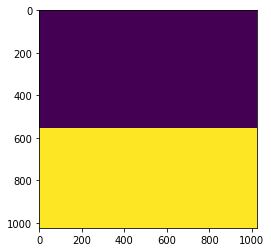

In [82]:
plt.imshow(labels)